In [1]:
#NOTE: Before Starting, you must register at www.tng-project.org/data and obtain an API key
#Edit the file "load_api_key.py" with your API key
#Then, add it to .gitignore ("echo load_api_key.py > .gitignore") before committing any changes.

import tng_api_utils as tau
import matplotlib
import matplotlib.pyplot as pyplot
%matplotlib inline


In [3]:
#obtain pristine mock image from IllustrisTNG data release
#specify simulation
sim='TNG100-1'
#specify snapshot (redshift) and galaxy id (aka SubFind ID or sfid)
#we can select catalogs of these two quantities to iterate over to prepare new training sets
#not the fastest thing in the world, but super easy
snap=91
sfid=10

filter_key='stellarBand-ps1_g'

mag=tau.get_subhalo_magnitude(sim=sim,snap=snap,sfid=sfid,partField=filter_key)
print(mag)

#size = size in kpc
image_size=100
effective_redshift=0.05
kpc_per_arcsec = tau.tngcos.kpc_proper_per_arcmin(effective_redshift).value/60
lsst_pix_size=0.2 #arcsec
n_pix=np.int32((image_size/kpc_per_arcsec)/lsst_pix_size)

pristine_hdu=tau.get_subhalo_mockdata_as_fits(sim=sim,snap=snap,sfid=sfid,partField=filter_key,
                                              nPixels=n_pix,
                                              size=image_size,sizeType='kpc',
                                              distmod=tau.tngcos.distmod(effective_redshift).value)
print(pristine_hdu.header.cards)


#useful, related utility:
#snap_dict = tau.get(tau.baseUrl+'/'+sim+'/snapshots/'+str(snap))
#redshift=snap_dict['redshift']


-22.119712829589844
('XTENSION', 'IMAGE', 'Image extension')
('BITPIX', -32, 'array data type')
('NAXIS', 2, 'number of array dimensions')
('NAXIS1', 495, '')
('NAXIS2', 495, '')
('PCOUNT', 0, 'number of parameters')
('GCOUNT', 1, 'number of groups')
('PIXSCALE', 0.20202020202020202, 'kpc')
('DISTMOD', 36.80513123854378, 'distance modulus assumed for flux calculation')
('EXTNAME', 'MockData', '')
('SIM', 'TNG100-1', '')
('SNAP', 91, '')
('SFID', 10, '')
('PTYPE', 'stars', '')
('PFIELD', 'stellarBand-ps1_g', '')
('NPIXELS', 495, '')
('AXES', '0,1', '')
('ORIGUNIT', 'ABS AB mag', 'downloaded units')
('BUNIT', 'nanoJanskies', 'final units')


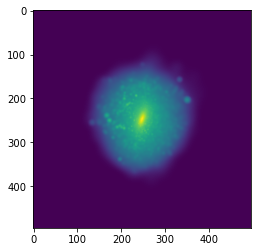

In [5]:
pyplot.imshow(np.log10(pristine_hdu.data+1.0))

In [6]:
#convolve with simple PSF model
psf_hdu=tau.convolve_with_fwhm(pristine_hdu,fwhm_arcsec=0.15)

In [30]:
#add simple noise model
psfnoise_hdu=tau.add_simple_noise_extractedsn(psf_hdu,extractedsn=20)

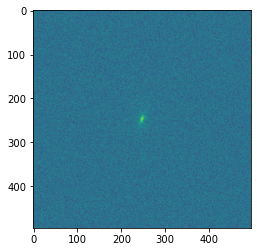

In [31]:
#visualize
pyplot.imshow(psfnoise_hdu.data)

In [ ]:
#save data
pri=fits.PrimaryHDU(pristine_hdu.data,header=pristine_hdu.header)
hdulist=fits.HDUList([pri,psf_hdu,psfnoise_hdu])
hdulist.writeto('tng_example_mock.fits')

In [ ]:
#After this step is probably when you would want to resize/reshape before feeding to CNNs...